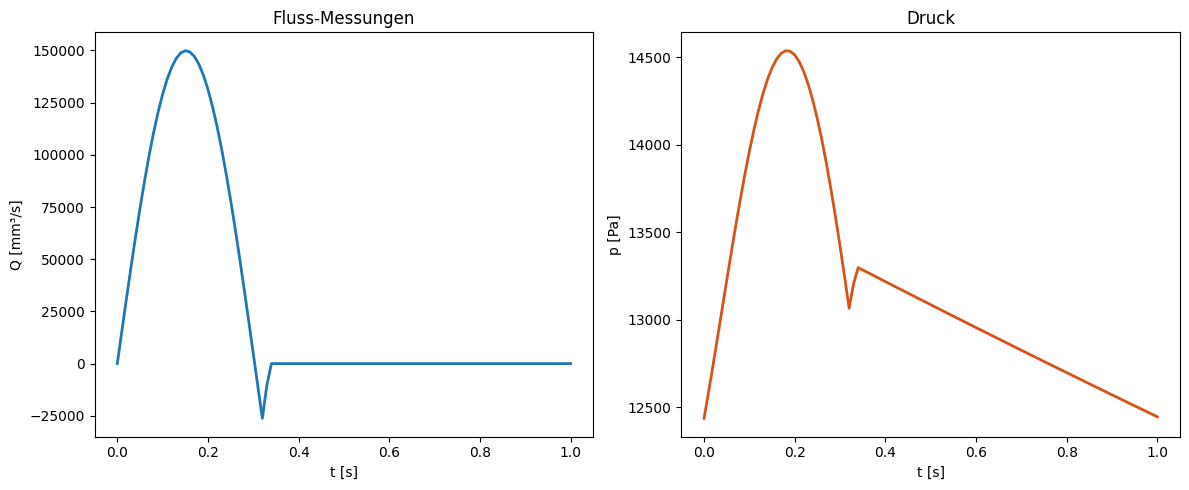

Durchschnittswert Fluss: 28435 mm³/s
Durchschnittswert Druck: 13188 Pa
Druck P(t = 0.9s): 1.257e+04 Pa
Druck P(t = 1.0s): 1.245e+04 Pa


In [ ]:
# WINDKESSEL-MODELLSIMULATION IN PYTHON

import numpy as np
import matplotlib.pyplot as plt

# Windkessel-Parameter
Rs = 1 * 0.010273
Rp = 1 * 0.456616
C = 1 * 4.367262725


### Berechnung
############################################################### CODING ###########################################################################
############################################################ DO NOT TOUCH ##########################################################################
##################################################################################################################################################

# Gesamtwiderstand
R = Rs + Rp

# Zykluslänge [s]
T = 1.0

# Zeitschritt [s] (fuer Loesung des Anfangswertproblems)
dt = 0.01

# Maximale Simulationszeit [s]
tmax = 50.0

# Anzahl der Zeitschritte
Nmax = int(tmax / dt) + 1

# Zeitvektor
t = np.linspace(0, tmax, Nmax)

# Initialisierung der Druck- und Flussarrays
P = np.zeros(Nmax)
Q = np.zeros(Nmax)

# Flussprofil zur Interpolation
Q_profile = 1000.0 * np.array([
    0.000000, 15.679269, 31.186754, 46.352549, 61.010496, 75.000000,
    88.167788, 100.369591, 111.471724, 121.352549, 129.903811, 137.031819,
    142.658477, 146.722140, 149.178284, 150.000000, 149.178284, 146.722140,
    142.658477, 137.031819, 129.903811, 121.352549, 111.471724, 100.369591,
    88.167788, 75.000000, 61.010496, 46.352549, 31.186754, 15.679269, 0.000000,
    -15.679269, -31.186754, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
    *([0.0] * (100 - 38))
])

# Flussmessung (Interpolationsfunktion)
def flussmessungen(t, T):
    L = len(Q_profile)
    tzyklus = t % T
    x = tzyklus * (L - 1) / T
    xd = int(np.floor(x))
    if xd >= L - 1:
        return Q_profile[-1]
    return Q_profile[xd] * (xd + 1 - x) + Q_profile[xd + 1] * (x - xd)

# Berechnung der Druckentwicklung
for i in range(1, Nmax):
    qn = flussmessungen(t[i - 1], T)
    qnp = flussmessungen(t[i], T)
    pn = P[i - 1]

    Kpnp = (0.5 + C * Rp / dt)
    Kpn = (0.5 - C * Rp / dt)
    Kqnp = (0.5 * R + C * Rs * Rp / dt)
    Kqn = (0.5 * R - C * Rs * Rp / dt)

    pnp = (-Kpn * pn + Kqn * qn + Kqnp * qnp) / Kpnp

    P[i] = pnp
    Q[i] = qnp

# Letzten Zyklus extrahieren
Ncycl = int(T / dt) + 1
Pconv = P[-Ncycl:]
Qconv = Q[-Ncycl:]
tconv = np.linspace(0, T, Ncycl)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tconv, Qconv, linewidth=2)
plt.xlabel('t [s]')
plt.ylabel('Q [mm³/s]')
plt.title('Fluss-Messungen')

plt.subplot(1, 2, 2)
plt.plot(tconv, Pconv, color=[0.8500, 0.3250, 0.0980], linewidth=2)
plt.xlabel('t [s]')
plt.ylabel('p [Pa]')
plt.title('Druck')

plt.tight_layout()
plt.show()

# Berechnung der Mittelwerte über den letzten Zyklus
Qint = np.trapezoid(Qconv, dx=dt) / T
Pint = np.trapezoid(Pconv, dx=dt) / T

print(f'Durchschnittswert Fluss: {Qint:.0f} mm³/s')
print(f'Durchschnittswert Druck: {Pint:.0f} Pa')

# Spezifische Druckwerte
idx_1 = np.isclose(tconv, 0.9)
idx_2 = np.isclose(tconv, 1.0)
print(f'Druck P(t = 0.9s): {Pconv[idx_1][0]:.3e} Pa')
print(f'Druck P(t = 1.0s): {Pconv[idx_2][0]:.3e} Pa')
